In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros

In [12]:
# Define constants
R = 1.0  # Radius of the disk in meters
alpha = 23e-6  # Thermal diffusivity of iron in m^2/s
boundary_temp = 0  # Boundary temperature in degrees Celsius

# Time points in seconds: 0s, 1min, 10min, 1hour
times = [0, 60, 600, 3600]

# Number of Bessel functions to consider
num_terms = 10

# Bessel function zeros for J0 (used in Bessel-Fourier expansion)
bessel_zeros = jn_zeros(0, num_terms)

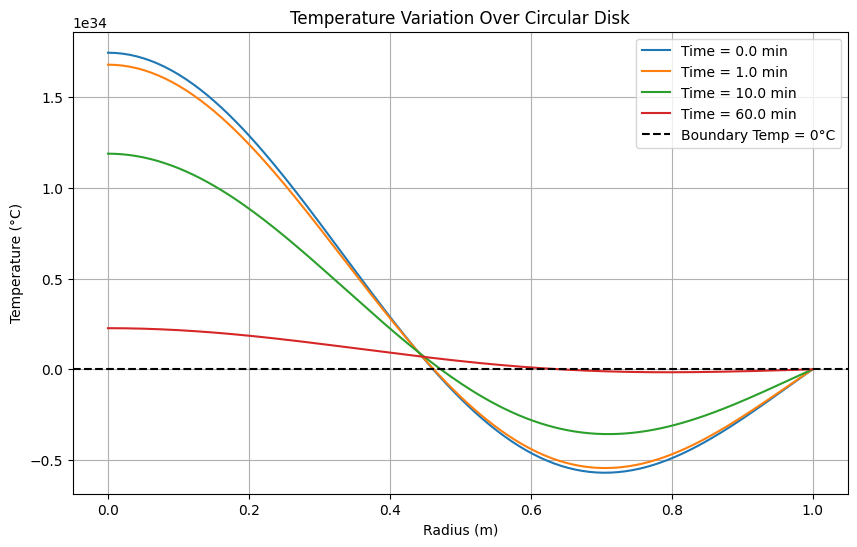

In [13]:

# Initial condition: Let's assume a Gaussian temperature distribution centered at r = 0
def initial_temperature(r):
    return np.exp(-5 * r**2) * 100  # Example: Gaussian peak of 100 degrees at the center

# Calculate the Fourier-Bessel coefficients
def compute_coefficients():
    coefficients = []
    for n in range(num_terms):
        beta_n = bessel_zeros[n]
        # Compute the coefficient A_n using numerical integration
        integral = np.trapz([r * initial_temperature(r) * j0(beta_n * r / R) for r in np.linspace(0, R, 100)], dx=R/100)
        A_n = (2 / (R**2 * (j0(beta_n)**2))) * integral
        coefficients.append(A_n)
    return coefficients

# Compute the temperature distribution using Bessel-Fourier series
def temperature_distribution(r, t, coefficients):
    temp = np.zeros_like(r)
    for n in range(num_terms):
        beta_n = bessel_zeros[n]
        A_n = coefficients[n]
        decay_factor = np.exp(-alpha * (beta_n / R)**2 * t)
        temp += A_n * decay_factor * j0(beta_n * r / R)
    return temp

# Create radial points
r_values = np.linspace(0, R, 200)

# Compute the Fourier-Bessel coefficients from the initial condition
coefficients = compute_coefficients()

# Plot temperature distributions at different time points
plt.figure(figsize=(10, 6))

for t in times:
    temp = temperature_distribution(r_values, t, coefficients)
    plt.plot(r_values, temp, label=f'Time = {t / 60:.1f} min')

plt.title('Temperature Variation Over Circular Disk')
plt.xlabel('Radius (m)')
plt.ylabel('Temperature (°C)')
plt.axhline(0, color='black', linestyle='--', label='Boundary Temp = 0°C')
plt.legend()
plt.grid(True)
plt.show()
